# Extracting Stock and Revenue Data
For crucial reasons, the stock and quarterly revenue for organisations is analysed. In this project, the aforementioned data — for companies like Tesla and GameStop are extracted mainly using yfinance and webscraping; moreover, the data is illustrated/visualized in a dashboard.

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Installing of Modules</li>
        <li>Importing The Required Modules </li>
        <li>Extracting Tesla Stock Data Using Y-finance </li>
        <li>Extracting Tesla Revenue Data Using Webscraping </li>
        <li>Extracting GameStop Stock Data using Y-finance </li>
        <li>Extracting GameStop Revenue Data using Webscraping </li>
        <li>Graph plotting For Tesla Stock Data </li>
        <li>Graph plotting For GameStop Stock Data </li>
    </ul>

</div>

<hr>

<h3>Installation of modules</h3>

In [1]:
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
!pip install lxml==4.6.4
#!pip install plotly==5.3.1
!pip install yfinance==0.2.4
#!pip install pandas==1.3.3



                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/noarch         [<=>                 ] (00m:00s) 
pkgs/main/noarch       

<h3>Importing The Required Modules</h3>

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

<h3>Extracting Tesla Stock Data using Y-finance </h3>

In [3]:
tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period = "max")

tesla_data.reset_index(inplace = True)

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<h3> Extracting Tesla Revenue Data using Webscraping </h3>

In [4]:
url1 = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

data1 = requests.get(url1).text
soup = BeautifulSoup(data1, "html5lib")
tesla_revenue= pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("table").find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
   
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)  
    
tesla_revenue.tail()

,Date,Revenue
9,2013,"$2,013"
10,2012,$413
11,2011,$204
12,2010,$117
13,2009,$112


<h3> Extracting GameStop Stock Data through Y-finance</h3>

In [5]:
game_stop = yf.Ticker("GME")

gme_data = game_stop.history(period = "max")

gme_data.reset_index(inplace = True)

gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5295,2023-02-27 00:00:00-05:00,19.610001,19.700001,18.889999,19.100000,4006700,0.0,0.0
5296,2023-02-28 00:00:00-05:00,19.059999,19.520000,18.950001,19.230000,3373800,0.0,0.0
5297,2023-03-01 00:00:00-05:00,18.920000,19.090000,18.139999,18.150000,4210100,0.0,0.0
5298,2023-03-02 00:00:00-05:00,18.150000,18.400000,17.620001,18.190001,2622100,0.0,0.0
5299,2023-03-03 00:00:00-05:00,18.190001,19.100000,18.100000,18.700001,2502000,0.0,0.0


<h3> Extracting GameStop Revenue Data through Web Scraping </h3>

In [6]:
url2 = "https://www.macrotrends.net/stocks/charts/GME/gamestop/stock-price-history"
data2 = requests.get(url2).text
soup = BeautifulSoup(data2, "html5lib")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("table").find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
   
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)  
    
gme_revenue.tail()

,Date,Revenue
16,2006,3.7988
17,2005,2.4268
18,2004,1.4943
19,2003,1.1394
20,2002,1.6062


<h3> Graph plotting For Tesla Stock Data </h3>

<AxesSubplot:title={'center':'Graph of Tesla Stock Data'}, xlabel='Date'>

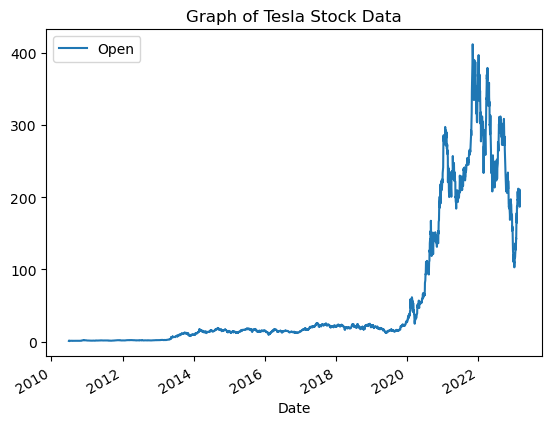

In [7]:
def make_graph():
    run = tesla_data.plot(x = "Date", y = "Open", title = "Graph of Tesla Stock Data")
    return run    
make_graph()    

<h3> Graph Plotting For GameStop Stock Data </h3>

<AxesSubplot:title={'center':'Graph of GameStop Stock Data'}, xlabel='Date'>

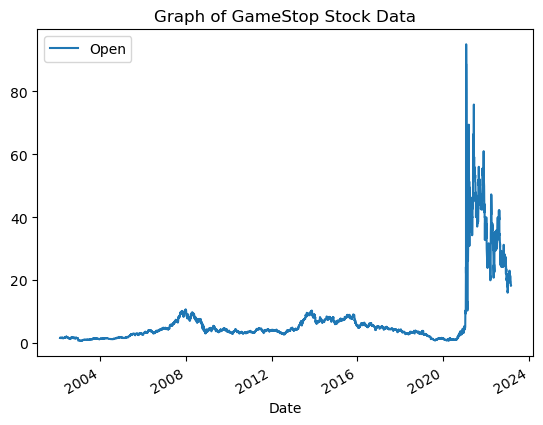

In [9]:
def make_graph():
    run2 = gme_data.plot(x = "Date", y = "Open", title = "Graph of GameStop Stock Data")
    return run2   
make_graph()    